# **Breast cancer Dectection (SVM)**

**Exploratory Data Analytics (EDA)**

* Created by : Isa Mariya | 2348427
* Created Date: 12.04.2024
* Edited Dates: 12.04.2024

SVM (Support vector machine)

It is a supervised learning technique which is used for classification,regression and outlier detection.

SVM works by mapping data to a high dimensional feature space so that the data points can be categorised, even when the data is not otherwise linearly seperable, which means a single line cannot classify the data into 2 classes(This gets done by kernal function of SVM classifier). A seperator between the categories is found, then the data is trasformed in such a way that the seperator could be drawn as a hyperplane.

in normal dimension we cant categorise using the hyperplane so we convert it to high dimensional.This is done using the hyperplane.

Objective

Use SVM to build and train a model using human cell records,and classify the cells to whether the samples are benign (mild state) or malignant (evil state).

**Importing the libraries**

In [ ]:
import numpy as np
import pandas as pd
#To convert to a dataframe as like to visualize in an excel sheet as rows and columns
import matplotlib.pyplot as plt
#pyplot is a subpackage
import seaborn as sns

**Importing Libraries**

Pandas: For organizing and analyzing data tables.

NumPy: For numerical operations and array manipulation.

Matplotlib: For creating basic graphs and charts.

Seaborn: For creating more visually appealing statistical graphics.

scipy: Used for statistical analysis and hypothesis testing.

**Loading the dataset**

In [ ]:
cell_df=pd.read_csv('/content/cell_samples.csv')
cell_df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


ID-Indentifier

clump-clump thickness

unifsize-uniformity of cell size

unifshape-uniformity of cell shape

margAdh-marginal adhesion

singEpiSize-single epithelila cell size

BareNuc-bare nuclei

blandchrom-bland chromatin

NormNucl-normal nucleoli

Mit-motosis

Class-benign or malignant

rows are records and columns are attributes or dimension
target column is the prediction column

In [ ]:
cell_df.shape

(699, 11)

There are 699 rows and 11 columns in the dataset.

In [ ]:
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [ ]:
#shows the 1st 5 rows

cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


**Distribution of the classes**

# **Univariate analysis**

In [ ]:
cell_df.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


The dataset contains 683 samples. The mean values for the features range from approximately 1.60 to 4.44, with standard deviations ranging from about 0.95 to 3.64. The minimum and maximum values for the features are between 1 and 10. The 25th, 50th (median), and 75th percentiles provide additional insights into the distribution of the data, showing the range within which the majority of the data falls for each feature. These statistics provide a summary of the dataset's numerical values, giving a sense of the central tendency, spread, and distribution of the features.

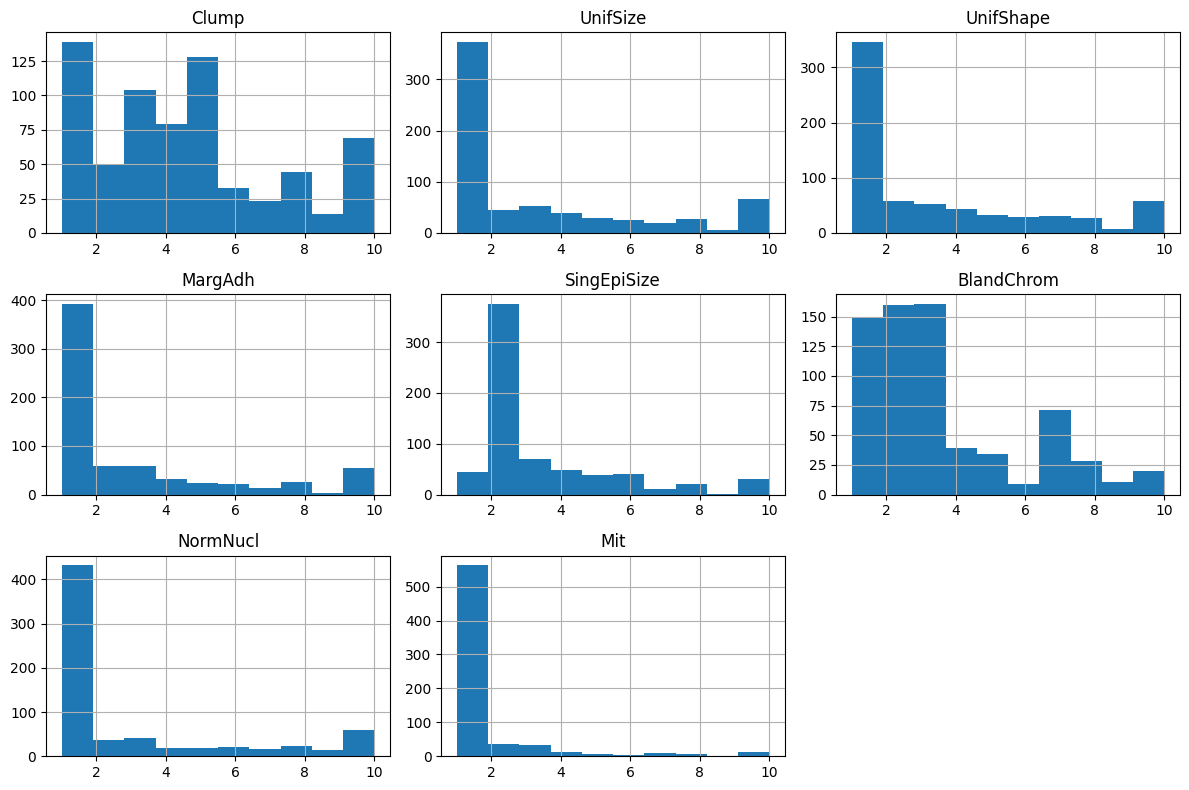

In [ ]:
# Visualize distribution using histograms
cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BlandChrom', 'NormNucl', 'Mit']].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

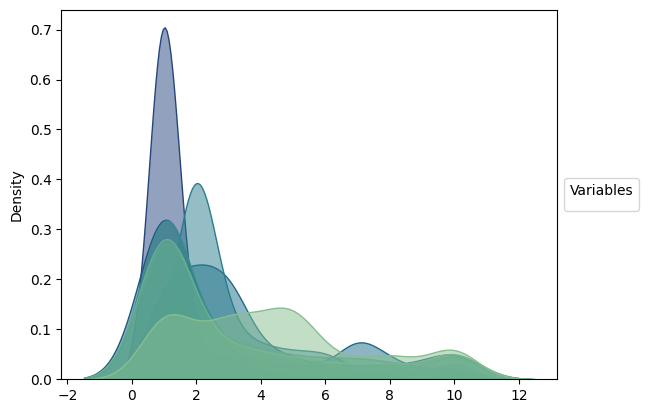

In [ ]:
# Visualize distribution using kernel density plots
sns.kdeplot(data=cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BlandChrom', 'NormNucl', 'Mit']], fill=True, common_norm=False, palette="crest", alpha=.5)
plt.legend(title="Variables", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

# **Bivariate Analysis**

<Axes: xlabel='Clump', ylabel='UnifSize'>

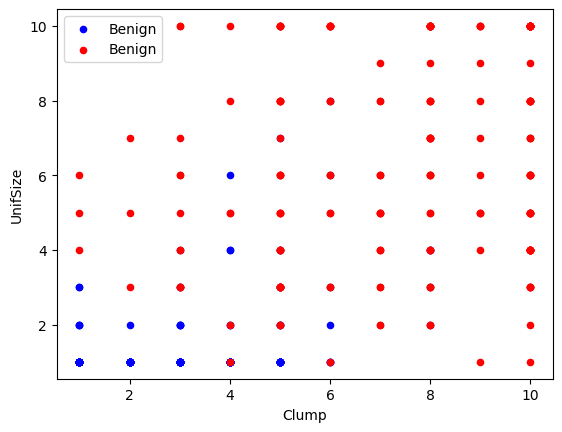

In [ ]:
benign_df=cell_df[cell_df['Class']==2][0:200]
malignant_df=cell_df[cell_df['Class']==4][0:200]

axes=benign_df.plot(kind='scatter',x='Clump',y='UnifSize',color='blue',label='Benign')
malignant_df.plot(kind='scatter',x='Clump',y='UnifSize',color='red',label='Benign',ax=axes)


Here the blue dots indicate the benign cancer and the red dots indicates the malignant cancer.the malignant cancer is seen mostly here in the scatter plot.

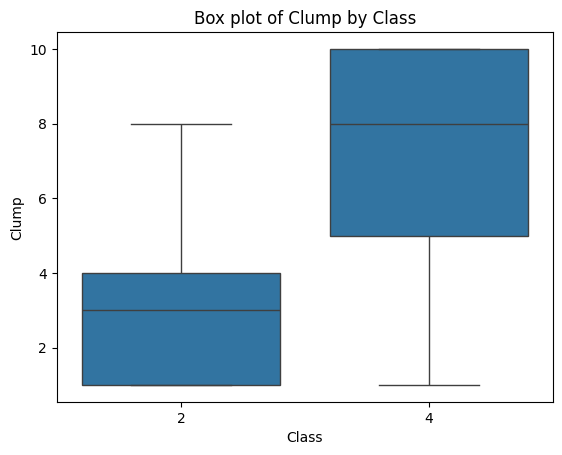

In [ ]:
# Box plot
sns.boxplot(x='Class', y='Clump', data=cell_df)
plt.title('Box plot of Clump by Class')
plt.show()

In [ ]:
correlation_matrix = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BlandChrom', 'NormNucl', 'Mit']].corr()
print("Correlation matrix:")
print(correlation_matrix)

Correlation matrix:
                Clump  UnifSize  UnifShape   MargAdh  SingEpiSize  BlandChrom  \
Clump        1.000000  0.642481   0.653470  0.487829     0.523596    0.553742   
UnifSize     0.642481  1.000000   0.907228  0.706977     0.753544    0.755559   
UnifShape    0.653470  0.907228   1.000000  0.685948     0.722462    0.735344   
MargAdh      0.487829  0.706977   0.685948  1.000000     0.594548    0.668567   
SingEpiSize  0.523596  0.753544   0.722462  0.594548     1.000000    0.618128   
BlandChrom   0.553742  0.755559   0.735344  0.668567     0.618128    1.000000   
NormNucl     0.534066  0.719346   0.717963  0.603121     0.628926    0.665602   
Mit          0.350957  0.460755   0.441258  0.418898     0.480583    0.346011   

             NormNucl       Mit  
Clump        0.534066  0.350957  
UnifSize     0.719346  0.460755  
UnifShape    0.717963  0.441258  
MargAdh      0.603121  0.418898  
SingEpiSize  0.628926  0.480583  
BlandChrom   0.665602  0.346011  
NormNucl    

The correlation matrix indicates strong positive correlations between Clump, UnifSize, and UnifShape, suggesting their importance in predicting the class variable. MargAdh, SingEpiSize, and BlandChrom also show moderate positive correlations, indicating their relevance. Mit displays weaker positive correlations, suggesting less influence on the class variable. No strong negative correlations are observed, indicating that features generally move in the same direction. This suggests the potential significance of certain features in predicting the class variable, aiding in feature selection and model development.

**Identifying unwanted rows**

In [ ]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

Here we can see a non numeric column so we are removing the column. We can use methods to either substitute it or we can just remove it.

In [ ]:
#converting all the values to numeric
cell_df=cell_df[pd.to_numeric(cell_df['BareNuc'],errors='coerce').notnull()]

instead of we have options to raise or ignore. Notnull is used to pic only the non null

In [ ]:
cell_df['BareNuc']=cell_df['BareNuc'].astype('int')
cell_df.dtypes

<ipython-input-13-037a21dbcf9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_df['BareNuc']=cell_df['BareNuc'].astype('int')


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

astype forcefully converts the values to the numerical form of what it is mentioned. Now we can see that all the variables is in the numerical form.

**Remove unwanted columns**

In [ ]:
cell_df.columns
#picking up the relavent columns by removing class and ID from the variables
feature_df=cell_df[[ 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

#converting to numpy array

#x-independent variables
X=np.asarray(feature_df)

#y-dependent variable
y=np.asarray(cell_df['Class'])


cell dataframe had 100 rows and 11 columns from which we have picked 9 columns.We are converting to numpy np array as we have to pass it as an argument we can even pass it directly as a dataframe too.

In [ ]:
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

Here each elements(1st row) itself is an array.

**Dividing the data as Train/Test dataset**

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

Here train and test has to components x and y where x is a 2d array and y is 1d array.This ramdom state is being applied as a seed where it decides which rows to choose as for training and for testing.

In [ ]:
print(X_train.shape)

print(y_train.shape)

print(X_test.shape)

print(y_test.shape)

(546, 9)
(546,)
(137, 9)
(137,)


Here for training dataset we have 546 rows and 9 columns where as for testing we have 546 rows and 1 column.

**Modeling (SVM with Scikit-learn)**

SVC is support vector classifier it refers those data points near to the hyperplane whose perpendicular distance to the hyperplane if we sum up for all the nearby points of the hyperplane and maximise the distance it is calles SVC.
(If the sum is maximum compared to other hyperplanes then such set of datapoints is called Support vector classifiers)
SVC passes the kernal function.

kernal is a function which itself visulises or sees the data from other set of dimensions so we can easily fit the hyperplane which was not possible with the given dimensions.

**4 kernals**

linear

polynomial

radial basis function(RBF) (default)

sigmoid


For each kernals we will be having the kernal coefficients which is represented by gamma,used foor calculating hyperplane with new set of dimensions.

c is the penality(cost) applied on incorrectly placing the datapoints in the new hyperplane. Hyperplane segregates the 2 classes and if the datapoint which is to be placed on group 1 is placed on group 2 by the hyperplane it results in the penality.
2 for each datapoints incorrectly given so total would be 2 multiplied with the total number of incorreclty placed datapoints.

# **Linear**

In [ ]:
from sklearn import svm

classifier=svm.SVC(kernel='linear',gamma='auto',C=2)

In [ ]:
classifier.fit(X_train,y_train)
y_predict=classifier.predict(X_test)


X denotes multi dimensional data so in capital letters and y is 1d data.

y_test is the actual value of the classes of each of the record in x_test and y_predict is the values predicted by the system. so we compare and evaluate

In [ ]:
#comparing y_test and y_predict

from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



precision is 100%(2-benign) for one of the class and 90%(4-malignant) for the other class.precision is the ratio of true prediction upon true prediction and false prediction(sum).

confusion matrix-out of all the predicted positives( actually having severe cancer) how many are the right predictions.

recall is true positive upon the sum of true positive and false negative(that is true positive upon total actual positive)

f1=2*((prediction * recall)/(precision + recall))

support means how many cases of class 2(90) and class 4(17) in out test 90+47=137 is the total dataset.

In [ ]:
# Polynomial kernel
poly_classifier = svm.SVC(kernel='poly', degree=3, gamma='auto', C=2)
poly_classifier.fit(X_train, y_train)
poly_y_predict = poly_classifier.predict(X_test)

# Radial basis function (RBF) kernel
rbf_classifier = svm.SVC(kernel='rbf', gamma='auto', C=2)
rbf_classifier.fit(X_train, y_train)
rbf_y_predict = rbf_classifier.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_test, y_predict, kernel):
    print("Kernel:", kernel)
    print("Accuracy:", accuracy_score(y_test, y_predict))
    print("Precision:", precision_score(y_test, y_predict, average='weighted'))
    print("Recall:", recall_score(y_test, y_predict, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_predict, average='weighted'))
    print("\n")

evaluate_model(y_test, poly_y_predict, 'Polynomial')
evaluate_model(y_test, rbf_y_predict, 'RBF')


Kernel: Polynomial
Accuracy: 0.9708029197080292
Precision: 0.9730928867897524
Recall: 0.9708029197080292
F1 Score: 0.9710669934861801


Kernel: RBF
Accuracy: 0.9635036496350365
Precision: 0.967012914093206
Recall: 0.9635036496350365
F1 Score: 0.9639038982104676




In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

def display_results(y_test, y_predict, kernel):
    print("Kernel:", kernel)
    print("Classification Report:")
    print(classification_report(y_test, y_predict))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_predict))
    print("\n")

display_results(y_test, poly_y_predict, 'Polynomial')
display_results(y_test, rbf_y_predict, 'RBF')


Kernel: Polynomial
Classification Report:
              precision    recall  f1-score   support

           2       1.00      0.96      0.98        90
           4       0.92      1.00      0.96        47

    accuracy                           0.97       137
   macro avg       0.96      0.98      0.97       137
weighted avg       0.97      0.97      0.97       137

Confusion Matrix:
[[86  4]
 [ 0 47]]


Kernel: RBF
Classification Report:
              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion Matrix:
[[85  5]
 [ 0 47]]




Based on the results:

1. **Accuracy**: All three models (Linear, Polynomial, RBF) perform well with high accuracy scores ranging from 0.963 to 0.971, indicating that they are able to correctly classify the majority of the samples.

2. **Precision**: Precision measures the proportion of true positive predictions among all positive predictions. The Polynomial kernel has the highest precision for class 4 (malignant) with a score of 0.92, followed by the Linear and RBF kernels with scores of 0.90.

3. **Recall**: Recall (also known as sensitivity) measures the proportion of actual positives that were correctly identified. All three models have high recall scores ranging from 0.94 to 1.00, indicating that they are able to correctly identify the majority of positive samples.

4. **F1 Score**: The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall. The F1 scores for all three models are high, ranging from 0.95 to 0.98, indicating a good balance between precision and recall.

5. **Confusion Matrix**: The confusion matrix shows the number of true positive, false positive, true negative, and false negative predictions. All three models have a low number of false positive and false negative predictions, indicating good performance.

**Inference**: Overall, all three SVM models (Linear, Polynomial, RBF) perform well in classifying the breast cancer dataset. The Polynomial kernel slightly outperforms the others with slightly higher accuracy, precision, recall, and F1 scores. However, the differences in performance between the kernels are not significant. Further tuning of hyperparameters and exploring other classification algorithms could potentially improve the performance further.